In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

#restart
apt_total=pd.read_excel("apt_total.xlsx", index_col='Unnamed: 0')

In [2]:
def day_parser(x):
    if len(str(x)) == 1:
        return "0"+str(x)
    else:
        return x
apt_total["계약일"].map(day_parser)

0        17
1        22
2        25
3        14
4        14
         ..
46364    04
46365    05
46366    07
46367    18
46368    26
Name: 계약일, Length: 81795, dtype: object

In [3]:
apt_total["계약일"] = apt_total["계약일"].map(day_parser)


In [4]:
import datetime

In [5]:
apt_total['ymd'] = pd.to_datetime(apt_total.계약년월.astype('str') + apt_total.계약일.astype('str'))

In [6]:
apt_total

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,거래금액,구분,보증금(만원),월세(만원),계약기간,계약구분,갱신요구권 사용,종전계약 보증금 (만원),종전계약 월세 (만원),ymd
0,서울특별시 서대문구 남가좌동,377,377,0,DMC래미안클라시스,59.93,200601,17,"21,500",7.0,...,21500.0,매매,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-17
1,서울특별시 서대문구 남가좌동,377,377,0,DMC래미안클라시스,84.90,200601,22,"30,350",11.0,...,30350.0,매매,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-22
2,서울특별시 서대문구 남가좌동,377,377,0,DMC래미안클라시스,59.59,200601,25,"20,200",9.0,...,20200.0,매매,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-25
3,서울특별시 서대문구 남가좌동,377,377,0,DMC래미안클라시스,59.59,200602,14,"21,000",10.0,...,21000.0,매매,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-14
4,서울특별시 서대문구 남가좌동,377,377,0,DMC래미안클라시스,84.90,200602,14,"28,000",5.0,...,28000.0,매매,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46364,서울특별시 서대문구 홍제동,331,331,0,홍제현대,75.15,202203,04,NaN,10.0,...,NaN,전세,"39,375",0.0,-,-,-,,,2022-03-04
46365,서울특별시 서대문구 홍제동,331,331,0,홍제현대,75.15,202203,05,NaN,8.0,...,NaN,전세,"38,000",0.0,-,-,-,,,2022-03-05
46366,서울특별시 서대문구 홍제동,331,331,0,홍제현대,83.05,202203,07,NaN,15.0,...,NaN,월세,"25,000",100.0,-,-,-,,,2022-03-07
46367,서울특별시 서대문구 홍제동,331,331,0,홍제현대,75.15,202203,18,NaN,5.0,...,NaN,전세,"52,000",0.0,-,-,-,,,2022-03-18


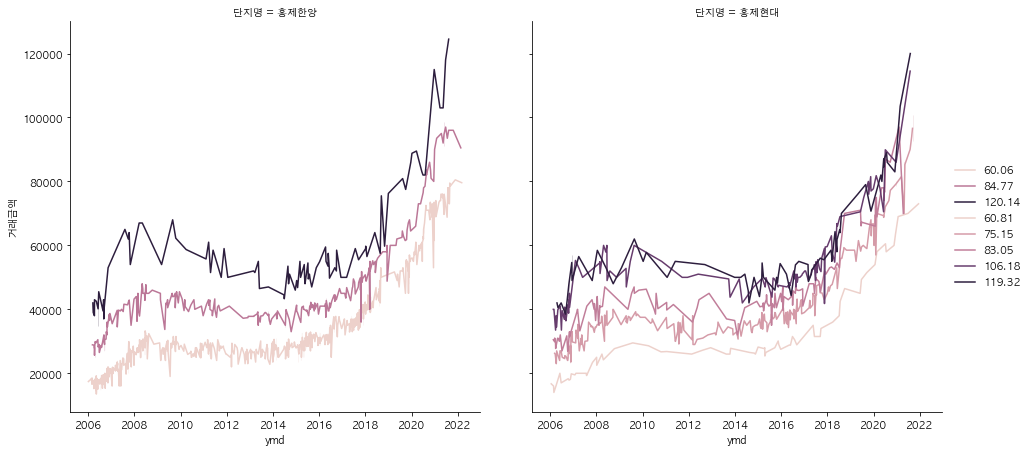

In [20]:
g = sns.FacetGrid(data = apt_total[apt_total['단지명'].isin(['홍제한양', '홍제현대'])], col='단지명')
g.map_dataframe(sns.lineplot, x = 'ymd', y = '거래금액', hue='전용면적(㎡)')
plt.gcf().set_size_inches(15, 8)
g.add_legend()
plt.show()

In [11]:
hongje = apt_total[apt_total['단지명'].isin(['홍제한양', '홍제현대'])]
hongje_date=apt_total[(apt_total['단지명'].isin(['홍제한양', '홍제현대'])) & (apt_total['ymd'] >= '2017-01-01')]

In [28]:
hongje_pi = hongje.groupby(['계약년월', '단지명', '전용면적(㎡)'], as_index=False).mean()

In [42]:
hongje_pi['계약년월']= pd.to_datetime(hongje_pi['계약년월'], format='%Y%m')
option = (hongje_pi['단지명'] == '홍제한양') & (hongje_pi['전용면적(㎡)'] == 60.06) & (hongje_pi['계약년월'] >= '2017-01-01')

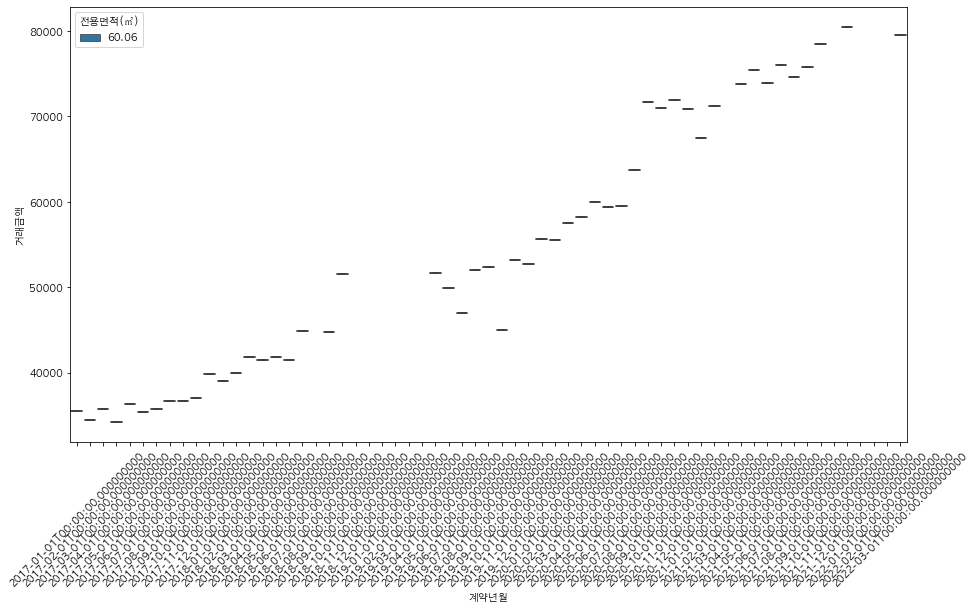

In [44]:
sns.boxplot(x = '계약년월', y = '거래금액', hue='전용면적(㎡)', data=hongje_pi[option])
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation=45)

plt.show()